# K Mean clustering

**we have to show clustering and then perfrom Silhouette Score and Algo**

**Minimize the distance between data points and their cluster centroid**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [11]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Cluster            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [19]:
# Statistical summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
count,150.000000,150.000000,150.000000,150.000000,150.00000
mean,5.843333,3.057333,3.758000,1.199333,0.50000
std,0.828066,0.435866,1.765298,0.762238,0.73045
min,4.300000,2.000000,1.000000,0.100000,0.00000
25%,5.100000,2.800000,1.600000,0.300000,0.00000
50%,5.800000,3.000000,4.350000,1.300000,0.00000
75%,6.400000,3.300000,5.100000,1.800000,1.00000
max,7.900000,4.400000,6.900000,2.500000,2.00000


In [20]:
# Selecting all numerical features
X = df.values

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [21]:
silhouette_scores = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K = {k}, Silhouette Score = {score}")


K = 2, Silhouette Score = 0.5817500491982808
K = 3, Silhouette Score = 0.4798814508199817
K = 4, Silhouette Score = 0.3850454053045392
K = 5, Silhouette Score = 0.34503345350274617
K = 6, Silhouette Score = 0.3339432304006177


C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

In [35]:
kmeans_init = KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=1,
    max_iter=1,      # ONLY 1 iteration
    random_state=42
)

kmeans_init.fit(X_scaled)

initial_centroids = kmeans_init.cluster_centers_
initial_centroids_pca = pca.transform(initial_centroids)

C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
kmeans_final = KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=1,
    random_state=42
)

labels = kmeans_final.fit_predict(X_scaled)

final_centroids = kmeans_final.cluster_centers_
final_centroids_pca = pca.transform(final_centroids)

C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


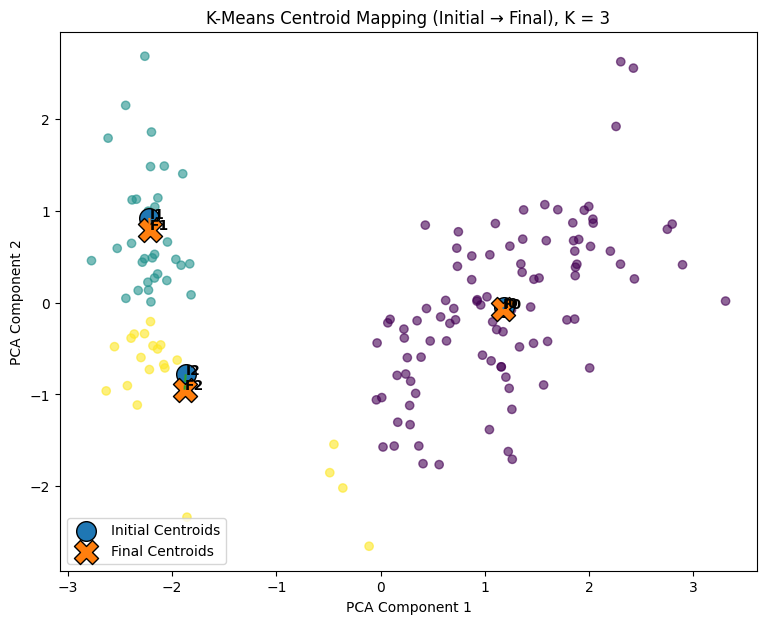

In [37]:
plt.figure(figsize=(9,7))

# Plot data points
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, alpha=0.6)

# Initial centroids (circles)
plt.scatter(
    initial_centroids_pca[:,0],
    initial_centroids_pca[:,1],
    marker='o',
    s=200,
    edgecolor='black',
    label='Initial Centroids'
)

# Final centroids (X)
plt.scatter(
    final_centroids_pca[:,0],
    final_centroids_pca[:,1],
    marker='X',
    s=300,
    edgecolor='black',
    label='Final Centroids'
)

# Draw centroid movement lines (INDEX-BASED MAPPING)
for i in range(3):
    plt.plot(
        [initial_centroids_pca[i,0], final_centroids_pca[i,0]],
        [initial_centroids_pca[i,1], final_centroids_pca[i,1]],
        linestyle='--'
    )
    plt.text(
        initial_centroids_pca[i,0],
        initial_centroids_pca[i,1],
        f"I{i}",
        fontsize=10,
        weight='bold'
    )
    plt.text(
        final_centroids_pca[i,0],
        final_centroids_pca[i,1],
        f"F{i}",
        fontsize=10,
        weight='bold'
    )

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Centroid Mapping (Initial → Final), K = 3")
plt.legend()
plt.show()


In [24]:
# Reducing 4D data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [29]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(X_scaled)

centroids_3 = kmeans_3.cluster_centers_
centroids_3_pca = pca.transform(centroids_3)

C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


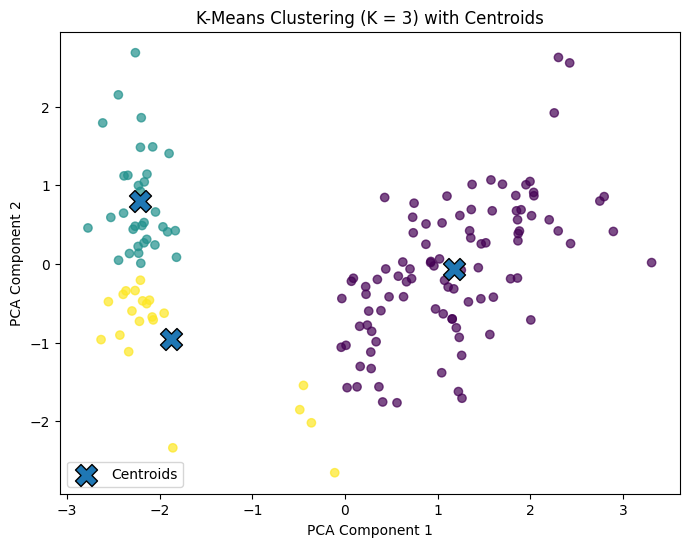

In [30]:
plt.figure(figsize=(8,6))

# Plot data points
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_3, alpha=0.7)

# Plot centroids
plt.scatter(
    centroids_3_pca[:,0],
    centroids_3_pca[:,1],
    marker='X',
    s=250,
    edgecolor='black',
    label='Centroids'
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (K = 3) with Centroids")
plt.legend()
plt.show()

In [31]:
score_3 = silhouette_score(X_scaled, labels_3)
print("Silhouette Score for K=3:", score_3)

Silhouette Score for K=3: 0.4798814508199817


In [32]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_4 = kmeans_4.fit_predict(X_scaled)

centroids_4 = kmeans_4.cluster_centers_
centroids_4_pca = pca.transform(centroids_4)

C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


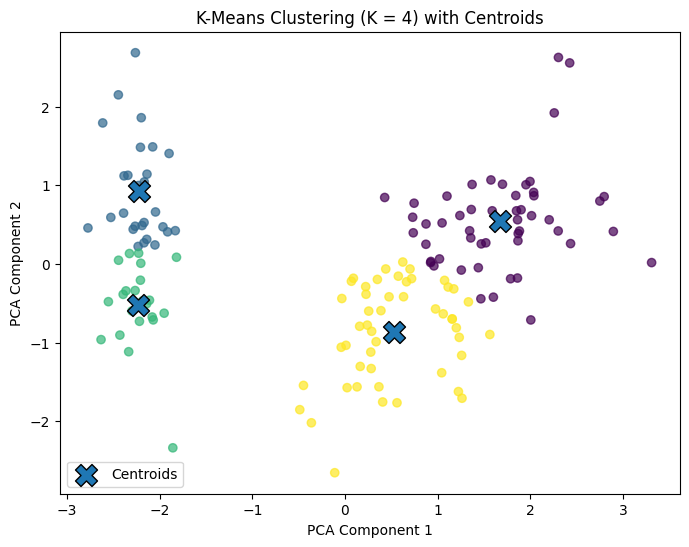

In [33]:
plt.figure(figsize=(8,6))

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_4, alpha=0.7)

plt.scatter(
    centroids_4_pca[:,0],
    centroids_4_pca[:,1],
    marker='X',
    s=250,
    edgecolor='black',
    label='Centroids'
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (K = 4) with Centroids")
plt.legend()
plt.show()

In [34]:
score_4 = silhouette_score(X_scaled, labels_4)
print("Silhouette Score for K=4:", score_4)

Silhouette Score for K=4: 0.3850454053045392
